Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       199
           1       0.55      0.53      0.54       201

    accuracy                           0.55       400
   macro avg       0.55      0.55      0.55       400
weighted avg       0.55      0.55      0.55       400



ValueError: X has 2 features, but SVC is expecting 10000 features as input.

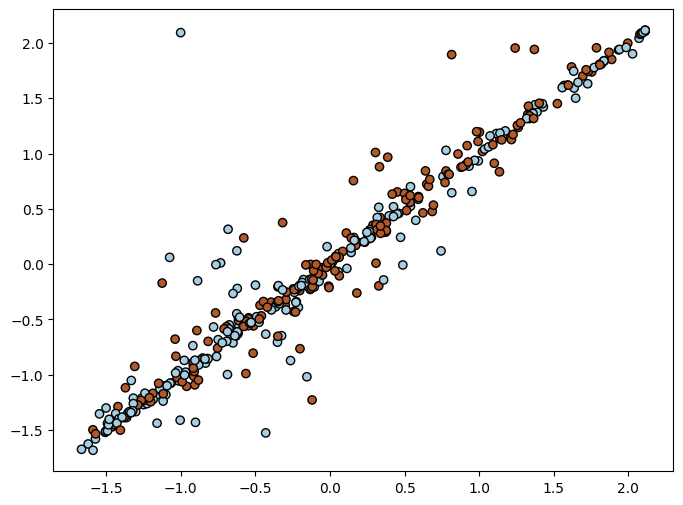

In [1]:
import os
import numpy as np
from skimage import io, color, transform
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
# Function to load and preprocess data
def load_and_preprocess_data(folder_path, num_samples=None):
    filenames = os.listdir(folder_path)[:num_samples]
    images = []
    labels = []

    for filename in filenames:
        label = 1 if 'dog' in filename else 0  # 1 for dog, 0 for cat
        img_path = os.path.join(folder_path, filename)
        
        # Read image file
        img = io.imread(img_path)
        
        # Preprocess image
        img = color.rgb2gray(img)  # Convert to grayscale
        img = transform.resize(img, (100, 100))  # Resize the image

        images.append(img.flatten())  # Flatten the image array
        labels.append(label)

    return np.array(images), np.array(labels)

# Load and preprocess the data
dataset_path = "dogcat"
X, y = load_and_preprocess_data(dataset_path)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM model
svm_model = svm.SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)
# Plotting
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.Paired, edgecolors='k', marker='o', label='Test Data')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

# Plot decision boundary and margins
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.title('SVM Classification with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()